<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Final Project: Building an Image Classifier with Transfer Learning</h1>


Estimated time needed: **60** minutes


## Overview


In this lab, you will implement image classification using using <a href="https://cs231n.github.io/transfer-learning/">transfer learning</a>,with a pre-trained deep neural network. You will work with a provided image dataset and experiment with various hyperparameters to optimize model performance."


## Objectives


You’ll build an effective image classifier using a pretrained Convolutional Neural Network (ConvNet). In practice, very few people train an entire ConvNet from scratch with random initialization, as this requires a very large labeled dataset and significant computational resources. Instead, it is common to use a ConvNet that has been pretrained on a large dataset (such as ImageNet) by others, and adapt it for a specific task—a process known as transfer learning.
Here, we’ll use the pretrained network as a feature extractor by training only the final output layer on your dataset. Typically, 100–200 images are enough to get started, and training can be completed in a short amount of time. While adding more images can improve performance, the gains often diminish as the dataset grows.


## Instruction(s)
After completing the Notebook:
* Take the required screenshots of your work.
* Download the notebook using **File** > **Download**.
* You can either choose:
  
   **Option 1 – AI-Graded Submission:** Upload the downloaded notebook directly for AI-based evaluation.

   **Option 2 – Peer-Reviewed Submission:** Submit the screenshots you captured as evidence of your completed work                                                for peer evaluation.


# About the Dataset

The dataset used in this project consists of labeled images for two categories:

* **"Stop" Sign Images** – pictures that contain stop signs
* **"Not Stop" Sign Images** – pictures that do not contain any stop sign

These images have been collected and manually labeled to support supervised learning for a binary image classification task. The goal is to train a model that can distinguish between images that contain stop signs and those that do not.

🔗 **Download Links:**

<a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ExisQFol3hUHktTjm6a51w/final-project-stop-signs-1-2025-04-25-t-06-47-41-058-z.zip" target="_blank">
    Download Dataset
</a>

These ZIP files contain images grouped and are to be extracted into appropriate folders for training and validation.

## Dataset Structure After Extraction

```
/not_stopandstop
├── final-project-stop-signs-1-2025-04-25-t-06-47-41-058-z
    ├── 001.jpg
    ├── 002.jpg
    └── ...
```

## Dataset Summary

| Attribute    | Description                                            |
| ------------ | ------------------------------------------------------ |
| Image Format | JPG                                           |
| Image Size   | Varies (to be resized during preprocessing)            |
| Labels       | Binary: `not_stop`, `stop`                             |
| Task Type    | Image Classification                                   |
| Use Case     | Training a model to identify stop signs in road scenes |

## Usage Instructions

* Resize images to 224×224 pixels to ensure consistent input dimensions.
* Normalize image channels using mean [0.485, 0.456, 0.406] and std [0.229, 0.224, 0.225].
* Split the dataset into training and validation sets (e.g., 90/10 ratio).
* Apply data augmentation like random flips and small rotations on training data.
* Train a classifier using CNN or a pretrained model (e.g., ResNet).
* Evaluate the model using accuracy on the validation set.                                                       

This dataset simulates a real-world autonomous driving task and is ideal for practicing image classification pipelines from data preprocessing to model evaluation.



## Install and Import Libraries


**May take time for installation so please wait...**


In [1]:
!pip install torch torchvision
!pip install numpy pandas matplotlib tqdm pillow --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.6/915.6 MB 7.1 MB/s  0:03:27 eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.6 MB/s  0:00:01m 8.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 8.1 MB/s  0:01:11 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 8.9 MB/s  0:00:01 8.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 8.2 MB/s  0:00:10 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 9.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 438.2 kB/s  0:02:150m eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.2 MB/s  0:00:37 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.8 MB/s  0:00:005.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 5.4 MB/s  0:00:11 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 5.

Libraries for OS and Cloud


In [5]:
import os
import uuid
import shutil
import json
import copy
from datetime import datetime
import zipfile
import io
import requests
import random

Libraries for Data Processing and Visualization


In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import imshow
from tqdm import tqdm
from ipywidgets import IntProgress
import time 

Deep Learning Libraries


In [7]:
import torch
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader,random_split
from torch.optim import lr_scheduler
from torchvision import transforms
import torch.nn as nn
torch.manual_seed(0)
from torchvision.datasets import ImageFolder
from torchvision import transforms

**Plot train cost and validation accuracy:**

The `plot_stuff` function is used to visualize the model's training performance by plotting training loss and validation accuracy on the same graph using two different y-axes. 

The training loss, shown in red on the left y-axis, indicates how well the model is minimizing error during training. 

The validation accuracy, shown in blue on the right y-axis, reflects how well the model is performing on unseen data. 

By plotting both metrics together, this function helps monitor the learning process, identify trends, and detect issues such as overfitting—where the model performs well on training data but poorly on validation data. 
This kind of visualization is valuable for understanding the effectiveness of your training strategy and making informed adjustments to model architecture or hyperparameters.


In [8]:
def plot_stuff(COST, ACC):
    """
    Plots training cost (loss) and validation accuracy on the same figure using two y-axes.
    
    Parameters:
    COST (list or array): Total training loss per iteration (or epoch)
    ACC (list or array): Validation accuracy per iteration (or epoch)
    """
    
    # Create a new figure and a primary axis (ax1)
    fig, ax1 = plt.subplots()
    
    # Plot training loss on the primary y-axis (left)
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('Iteration', color=color)            # Label for x-axis
    ax1.set_ylabel('Total Loss', color=color)           # Label for y-axis (left)
    ax1.tick_params(axis='y', labelcolor=color)         # Set y-axis tick color

    # Create a secondary y-axis (ax2) sharing the same x-axis
    ax2 = ax1.twinx()
    
    # Plot validation accuracy on the secondary y-axis (right)
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)             # Label for y-axis (right)
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Adjust layout to prevent y-label clipping
    fig.tight_layout()
    
    # Display the combined plot
    plt.show()


**Plot the transformed image:**

When using `transforms.Normalize` during preprocessing (e.g., for pretrained CNNs like ResNet), images are normalized with mean and standard deviation values. But this makes the image look odd if displayed directly.

This function reverses that normalization so the image appears as a proper RGB image for visualization, especially useful for:

Checking your image pipeline.

Displaying samples from datasets.

Debugging predictions or model outputs.


In [9]:
def imshow_(inp, title=None):
    """
    Displays a tensor image after reversing normalization.
    
    Parameters:
    - inp (Tensor): Image tensor of shape [C, H, W], usually normalized.
    - title (str, optional): Title for the image display.
    """
    # Convert from [C, H, W] to [H, W, C] and to NumPy array
    inp = inp.permute(1, 2, 0).numpy()
    print("Image shape:", inp.shape)

    # Undo normalization (ImageNet mean and std)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean

    # Clip values to [0, 1] range for display
    inp = np.clip(inp, 0, 1)

    # Display image
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Short pause for GUI update
    plt.show()


Define our device as the first visible cuda device if we have CUDA available:


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("the device type is", device)


the device type is cuda:0


## Image Processing and Load Data for Dataset preparation¶


In this section, we will preprocess our dataset by resizing the images, converting them to tensors, and normalizing the image channels. These are the standard preprocessing steps for image data. In addition, we will apply data augmentation to the training dataset to improve generalization. The preprocessing steps for the test (or validation) dataset are the same, except that data augmentation is not applied, as we want to evaluate the model on unmodified images.


**Load Data for Dataset preparation**


Download the data:


In [11]:
# URL of the ZIP file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ExisQFol3hUHktTjm6a51w/final-project-stop-signs-1-2025-04-25-t-06-47-41-058-z.zip"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the zip file from the downloaded content
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall("not_stopandstop")  # Extract to a target folder
    print("Download and extraction complete.")
else:
    print("Failed to download file:", response.status_code)


Download and extraction complete.


Splits image data into training and validation sets: 
90% of the data will be used for training.


Set Path


In [12]:
#sets path
source_dir = "not_stopandstop/final-project-stop-signs-1-2025-04-25-t-06-47-41-058-z"  # folder containing images and annotation file
annotations_file = os.path.join(source_dir, "_annotations.json")  # update name if needed

Load Annotations


In [13]:
# Load annotations
with open(annotations_file, "r") as f:
    annotations = json.load(f)

Set Parameters


In [14]:
# Parameters
train_ratio = 0.9
output_dir = "dataset"  # Final output root directory


Prepare Label to Image Mapping


In [15]:
# Prepare label -> image list
label_to_images = {}

for filename, entry in annotations["annotations"].items():
    label = entry[0]["label"]
    label_to_images.setdefault(label, []).append(filename)

Shuffle and Split into Train/Validation


In [16]:
# Shuffle and split each class into training and validation sets
for label, image_list in label_to_images.items():
    random.shuffle(image_list)  # Shuffle the list of images to randomize the split
    
    # Calculate the number of training images (e.g., 90% of total)
    train_cutoff = int(len(image_list) * train_ratio)
    
    # Split the image list into training and validation sets
    train_images = image_list[:train_cutoff]
    val_images = image_list[train_cutoff:]

    # Loop over both splits: 'train' and 'val'
    for split, split_images in zip(["train", "val"], [train_images, val_images]):
        
        # Create the output directory for the current split and label
        # Example: dataset/train/not_stop or dataset/val/stop
        out_path = os.path.join(output_dir, split, label)
        os.makedirs(out_path, exist_ok=True)  # Create the directory if it doesn't exist

        # Copy each image from the source directory to the appropriate split folder
        for img_name in split_images:
            src = os.path.join(source_dir, img_name)  # Full path to the source image
            dst = os.path.join(out_path, img_name)    # Destination path
            shutil.copy2(src, dst)  # Copy the image (preserves metadata)

# Print completion message once all images are copied
print("Train/Val split complete.")


Train/Val split complete.


Splitting Dataset: 90% Training, 10% Validation We define train_ratio = 0.9 and apply it to split each class. The first 90% of shuffled images are used for training, and the remaining 10% for validation.


## Exercise 1: Apply Image Transformations


Complete the following code to define a preprocessing pipeline that resizes, converts, and normalizes the images using ImageNet statistics.
```python
#Define a series of transformations to apply to each image
transform = transforms.Compose([
    transforms.Resize((___, ___)),  # Resize images to 224×224 pixels to ensure consistent input dimensions.
    transforms.____(),              # Convert image to PyTorch tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],     # Mean for ImageNet pretrained models
        std=[0.229, 0.224, 0.225]       # Std deviation for ImageNet pretrained models
    )
])
```


In [17]:
# Define a series of transformations to apply to each image
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224×224 pixels (ResNet default input size)
    transforms.ToTensor(),           # Convert image to a PyTorch tensor in [0, 1]
    transforms.Normalize(            # Normalize using ImageNet statistics (matches pretrained ResNet)
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
])


**Note**: These normalization values center the data similarly to how the pretrained models were originally trained, which helps improve performance and convergence.



## Exercise 2: Load Datasets with Transformations
Complete the code to load the training and validation datasets using the correct folder paths and transformations.

```python

from torchvision.datasets import ImageFolder

# Load datasets from the respective folders
train_dataset = ImageFolder(root="dataset/____", transform=transform)
val_dataset = ImageFolder(root="dataset/____", transform=transform)
```


In [18]:
from torchvision.datasets import ImageFolder

# Load datasets from the respective folders
train_dataset = ImageFolder(root="dataset/train", transform=transform)

# No augmentation for validation; use deterministic preprocessing
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
val_dataset = ImageFolder(root="dataset/val", transform=val_transform)

print("Classes:", train_dataset.classes)
print("Train size:", len(train_dataset), "| Val size:", len(val_dataset))


Classes: ['not_stop', 'stop']
Train size: 177 | Val size: 20


**Note**: No augmentation is applied to the validation set — we want to evaluate model performance on real, unmodified images.


## Exercise 3: Visualize Samples from the Validation Set


It’s important to verify that image transformations are applied correctly and labels are loaded as expected.

Complete the following code to display the first 3 images from the validation dataset along with their labels:

```python

# Loop through the validation dataset and display the first 3 images
# Loop through the dataset (x: image tensor, y: label)
# Display the image with its label using a custom display function
# Stop after showing 3 images
# Increment the counter
i = 0
for x, y in val_dataset:
    ____ (x, f"y = {y}")
    i += 1               
    if i == ___:        
        break
```


Image shape: (224, 224, 3)


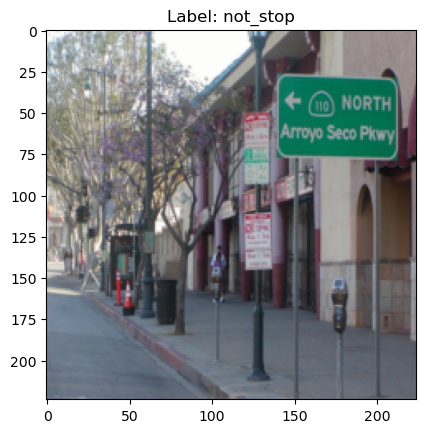

Image shape: (224, 224, 3)


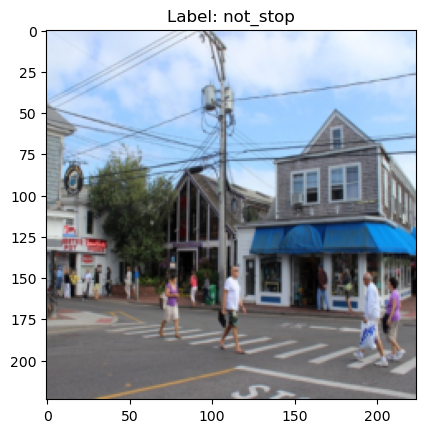

Image shape: (224, 224, 3)


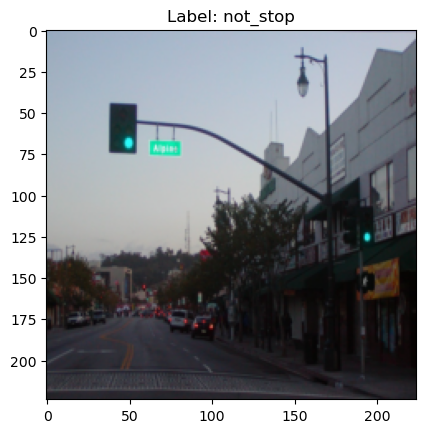

In [19]:
# Display the first 3 images from the validation dataset along with their labels
num_to_show = 3
for i in range(num_to_show):
    x, y = val_dataset[i]
    label = val_dataset.classes[y]
    imshow_(x.cpu(), title=f"Label: {label}")


**Note**:Early visual inspection helps catch issues in image format, normalization, or label mismatch before training the model.


## Exercise 4: Reflect on Your Dataset and Transformations

After applying transformations and visualizing sample images, consider the following questions:

1. Why is normalization important when using pretrained models?

2. What benefits does resizing the images to (224, 224) provide?

3. What would happen if input sizes varied?


### Exercise 4 – Reflection (Answers)

1. **Why normalization matters with pretrained models:**  
   Pretrained networks (like ResNet trained on ImageNet) expect inputs with a specific mean/std. Normalizing makes your inputs match that distribution, which stabilizes training and helps the model use its learned features effectively.

2. **Benefits of resizing to (224, 224):**  
   ResNet-18 expects a fixed input size; resizing gives consistent tensor shapes and makes batching possible.

3. **What if input sizes varied:**  
   You would get shape mismatches during batching and possibly in the network layers. Even if you pad/resize later, inconsistent preprocessing can reduce accuracy and make training unstable.


## Hyperparameters


Experiment with different hyperparameters:


## Exercise 5: Epochs and Batch Size
Instruction:
Read the description below and complete the code and questions that follow.

`Epoch` refers to one complete pass through the entire training dataset.

`Batch size` is the number of training samples utilized in one iteration. If the batch size is equal to the total number of samples in the training set, then every epoch has one iteration. In Stochastic Gradient Descent, the batch size is set to one. A batch size of 32--512 data points seems like a good value, for more information check out the following <a href="https://arxiv.org/abs/1609.04836?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-cvstudio-2021-01-01">link</a>.

```python
# Set the number of epochs and batch size
n_epochs = ____     # A typical small number like 10
batch_size = ____   # Try 32
```


In [20]:
# Set the number of epochs and batch size
n_epochs = 5
batch_size = 32

print("n_epochs =", n_epochs)
print("batch_size =", batch_size)


n_epochs = 5
batch_size = 32


## Exercise 6: Configure Learning Rate and Momentum
Instruction:
When training a neural network, two essential hyperparameters influence how weights are updated during optimization:

`Learning rate` is used in the training of neural networks. Learning rate is a hyperparameter with a small positive value, often in the range between 0.0 and 1.0.

`Momentum` (momentum): Helps accelerate gradients in the right direction, improving convergence and stability.

Complete the code below with appropriate values for training:

```python

# Set optimizer hyperparameters
learning_rate = _______     # Example: 0.000001
momentum = _______          # Example: 0.9
```


In [21]:
# Set optimizer hyperparameters
learning_rate = 0.01
momentum = 0.9

print("learning_rate =", learning_rate)
print("momentum =", momentum)


learning_rate = 0.01
momentum = 0.9


## Exercise 7: Learning Rate Scheduler – Understanding and Setup
Instruction:
Sometimes, instead of keeping the learning rate constant throughout training, we use a learning rate scheduler that gradually adjusts the learning rate. This can help improve convergence and generalization.

In this example, the learning rate will vary between a minimum (base_lr) and maximum (max_lr) over training iterations.
Complete the following lines to configure the learning rate scheduler settings:
```python
# Enable learning rate scheduling
lr_scheduler = _____          # Set True or False to control usage
base_lr = _____               # Minimum learning rate (e.g., 0.001)
max_lr = _____                # Maximum learning rate (e.g., 0.01)
```


In [22]:
# Enable learning rate scheduling
lr_scheduler = True

# CyclicLR settings (only used if lr_scheduler == True)
base_lr = learning_rate / 10
max_lr = learning_rate * 10

print("lr_scheduler =", lr_scheduler)
print("base_lr =", base_lr, "| max_lr =", max_lr)


lr_scheduler = True
base_lr = 0.001 | max_lr = 0.1


## Exercise 8: Analyze Training Configuration
Reflect on the training setup you've just defined and answer the following questions:

1. What is the purpose of choosing a specific number of epochs?
<details><summary>Click here for Hints</summary>
    Think about underfitting vs. overfitting.    
</details> 


2. Why is it important to choose an appropriate batch size?

   <details><summary>Click here for Hints</summary>
    Consider the impact on model stability, convergence speed, and memory usage.    
    </details> 

3. How does a learning rate scheduler help model training?
   <details><summary>Click here for Hints</summary>
   Think about how the learning rate affects the size of each update during training.    
   </details> 


### Exercise 8 – Analyze Training Configuration (Answers)

1. **Purpose of choosing a specific number of epochs:**  
   Epochs control how long the model trains. Too few epochs can lead to **underfitting** (model hasn’t learned enough). Too many can lead to **overfitting** (model memorizes training data and generalizes worse).

2. **Why choose an appropriate batch size:**  
   Batch size affects **training stability, speed, and memory usage**. Small batches add more noise (sometimes better generalization) but train slower; large batches are faster and smoother but may need more GPU memory and can generalize worse if too large.


# Load Model and Train


## Exercise 9: Load a Pretrained Model
Instruction: Load the ResNet-18 model from torchvision.models and set it up as a pretrained model.

```python

# Set the parameter pretrained to true.
model = models.resnet18(pretrained=____)
```


In [23]:
# Set the parameter pretrained to True.
model = models.resnet18(pretrained=True)


/home/dacekey/anaconda3/envs/computer_vision/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dacekey/anaconda3/envs/computer_vision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/dacekey/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████████████████████████████████| 44.7M/44.7M [00:05<00:00, 8.82MB/s]


## Exercise 10: Freeze Feature Extractor Layers
Instruction: Set the requires_grad flag to False for all parameters in the model so that they are not updated during training.

```python

# Freeze all the parameters to prevent updates during training
for param in model.________:
    param.________ = _______
```


In [24]:
# Freeze all the parameters to prevent updates during training
for param in model.parameters():
    param.requires_grad = False


## Exercise 11: Determine the Number of Classes
Instruction: Use the loaded training dataset to determine how many output classes your model needs to predict.

```python

# Find number of classes from the dataset
n_classes = len(train_dataset.______)
print(n_classes)
```


In [25]:
# Find number of classes from the dataset
n_classes = len(train_dataset.classes)
print(n_classes)


2


## Exercise 12: Replace the Output Layer
Instruction: Modify the final fully connected layer (model.fc) of the ResNet-18 model to output the correct number of classes.

```python

# Replace the output layer to match the number of classes
model.fc = nn.Linear(___, ___)
```
<details><summary>Click here for Hints</summary>
 ResNet-18’s final hidden layer has 512 neurons as input to model.fc.
</details>


In [26]:
# Replace the output layer to match the number of classes
model.fc = nn.Linear(512, n_classes)


Set device type


In [27]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Exercise 13: Define the Loss Function
Instruction: Set up the loss function to be used for training a multi-class classifier.

```python

# Define the loss function for multi-class classification
criterion = nn.____________________()
```
<details><summary>Click here for Hints</summary>        
Cross-entropy loss (also called log loss) is commonly used for classification problems where the target variable can take on one of C classes. It internally applies LogSoftmax, so you don’t need to apply a softmax layer separately before the loss.    
    
</details>


In [28]:
# Define the loss function for multi-class classification
criterion = nn.CrossEntropyLoss()


## Exercise 14: Create Data Loaders
Instruction: Initialize the data loaders to feed data in batches during training and evaluation.

```python

# Create data loaders for training and validation
train_loader = torch.utils.data.DataLoader(dataset=__________, batch_size=______, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=__________, batch_size=1)
```
<details><summary>Click here for Hints</summary>
For validation, a batch size of 1 is often used when you want to evaluate each image individually and get fine-grained performance insights.
</details>


In [29]:
# Create data loaders for training and validation
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=1, shuffle=False)

print("Train batches:", len(train_loader), "| Val batches:", len(validation_loader))


Train batches: 6 | Val batches: 20


## Exercise 15: Set Up the Optimizer
Instruction: Use the SGD optimizer to update the model parameters during training.

```python

# Initialize the optimizer
optimizer = torch.optim.SGD(model.___________(), lr=______, momentum=______)
```
<details><summary>Click here for Hints</summary>
 Use model.parameters() to pass trainable weights, and set learning_rate and momentum.
</details>


In [30]:
# Initialize the optimizer (only parameters with requires_grad=True will be updated)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)


## Exercise 16: Configure a Learning Rate Scheduler
Instruction: If learning rate scheduling is enabled, set up a cyclical learning rate scheduler.

```python

# Optional: use learning rate scheduler
if lr_scheduler:
    scheduler = torch.optim.lr_scheduler.CyclicLR(
        optimizer,
        base_lr=_____,        # Minimum learning rate e.g 0.001
        max_lr=_____,         # Maximum learning rate e.g 0.01
        step_size_up=5,
        mode="triangular2"
    )
```


In [31]:
# Optional: use learning rate scheduler
scheduler = None
if lr_scheduler:
    # CyclicLR usually steps every batch; we'll step it inside the training loop.
    step_size_up = max(1, len(train_loader) // 2)
    scheduler = torch.optim.lr_scheduler.CyclicLR(
        optimizer,
        base_lr=base_lr,        # Minimum learning rate
        max_lr=max_lr,          # Maximum learning rate
        step_size_up=step_size_up,
        mode="triangular2",
        cycle_momentum=False
    )


### The `train_model()` Function: Step-by-Step Explanation

This function handles the training and validation process for a deep learning model, including tracking performance and selecting the best model based on validation accuracy.



#### 🔹 Step 1: Initialize Tracking Variables

* Create lists to store:

  * Training loss per epoch (`loss_list`)
  * Validation accuracy per epoch (`accuracy_list`)
* Store the **initial model weights** as a baseline for comparison (`best_model_wts`)



#### 🔹 Step 2: Loop Over Epochs

For each epoch (a full pass through the training dataset):


#### Training Phase

* **Set model to training mode**: `model.train()`

* **Loop over batches in `train_loader`**:

  * Move input data `(x)` and labels `(y)` to the appropriate device (CPU/GPU)
  * Perform forward pass: `z = model(x)`
  * Compute loss: `loss = criterion(z, y)`
  * Backpropagate: `loss.backward()`
  * Update weights: `optimizer.step()`
  * Reset gradients: `optimizer.zero_grad()`

* **Track loss**: Append batch losses to a sublist, then compute the average and store it in `loss_list`



####  Adjust Learning Rate (Optional)

* If a learning rate scheduler is defined:

  * Call `scheduler.step()` to update the learning rate



####  Validation Phase

* **Set model to evaluation mode**: `model.eval()`

* **Disable gradient calculation**: Use `with torch.no_grad():`

* **Loop over `validation_loader`**:

  * Run forward pass
  * Predict labels using `torch.max()`
  * Count correct predictions

* **Calculate validation accuracy** and store in `accuracy_list`



#### Track and Save the Best Model

* If current validation accuracy exceeds previous best:

  * Save the model's weights using `copy.deepcopy(model.state_dict())`



#### Print Epoch Metrics (Optional)

* Print current learning rate, validation loss, and validation accuracy if `print_` is `True`



#### Final Step: Load Best Model

* After all epochs, load the saved weights corresponding to the best validation performance


#### Return Values

* Final trained model with best weights
* List of validation accuracies (`accuracy_list`)
* List of training losses (`loss_list`)




## Exercise 17: Implement and Analyze the Training Loop
Instructions: The function below defines a complete training and evaluation loop for a neural network model using PyTorch. Review the function carefully and complete the missing parts to ensure the model trains, tracks loss and accuracy, and retains the best-performing weights.

Complete the code and answer the questions that follow:
```python
def train_model(model, train_loader, validation_loader, criterion, optimizer, n_epochs, print_=True):
    loss_list = []        # Store average training loss per epoch
    accuracy_list = []    # Store validation accuracy per epoch
    correct = 0

    n_test = len(val_dataset)
    accuracy_best = 0
    best_model_wts = copy.deepcopy(model.________())  # Fill in the blank e.g state_dict()

    print("The first epoch should take several minutes")

    for epoch in tqdm(range(n_epochs)):
        loss_sublist = []

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            model.____()   # Set model to training mode

            z = model(x)
            loss = criterion(z, y)
            loss_sublist.append(loss.item())

            loss.________()        # Backpropagation
            optimizer.________()   # Update weights
            optimizer.________()   # Reset gradients

        print(f"Epoch {epoch + 1} done")

        # Step learning rate scheduler (if used)
        scheduler.step()

        loss_list.append(np.mean(loss_sublist))

        # Validation
        correct = 0
        model.eval()
        with torch.no_grad():
            for x_test, y_test in validation_loader:
                x_test, y_test = x_test.to(device), y_test.to(device)
                z = model(x_test)
                _, yhat = torch.max(z.data, 1)
                correct += (yhat == y_test).sum().item()

        accuracy = correct / n_test
        accuracy_list.append(accuracy)

        if accuracy > accuracy_best:
            accuracy_best = accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

        if print_:
            print("Learning rate:", optimizer.param_groups[0]['lr'])
            print(f"Validation loss (epoch {epoch + 1}): {np.mean(loss_sublist):.4f}")
            print(f"Validation accuracy (epoch {epoch + 1}): {accuracy:.4f}")

    model.load_state_dict(best_model_wts)
    return accuracy_list, loss_list, model
```


In [32]:
def train_model(model, train_loader, validation_loader, criterion, optimizer, n_epochs, print_=True, scheduler=None):
    """Train a model and keep the best weights based on validation accuracy."""
    loss_list = []        # Store average training loss per epoch
    accuracy_list = []    # Store validation accuracy per epoch

    n_test = len(val_dataset)
    accuracy_best = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())

    print("The first epoch should take several minutes")

    for epoch in tqdm(range(n_epochs)):
        # -------- Training --------
        model.train()
        loss_sublist = []

        for x, y in train_loader:
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()          # Reset gradients
            z = model(x)                   # Forward
            loss = criterion(z, y)         # Loss
            loss.backward()                # Backpropagation
            optimizer.step()               # Update weights

            # Step LR scheduler per batch (recommended for CyclicLR)
            if scheduler is not None:
                scheduler.step()

            loss_sublist.append(loss.item())

        epoch_loss = float(np.mean(loss_sublist)) if loss_sublist else float("nan")
        loss_list.append(epoch_loss)

        # -------- Validation --------
        model.eval()
        correct = 0
        with torch.no_grad():
            for x_test, y_test in validation_loader:
                x_test, y_test = x_test.to(device), y_test.to(device)
                z = model(x_test)
                _, yhat = torch.max(z.data, 1)
                correct += (yhat == y_test).sum().item()

        accuracy = correct / n_test if n_test > 0 else 0.0
        accuracy_list.append(accuracy)

        if accuracy > accuracy_best:
            accuracy_best = accuracy
            best_model_wts = copy.deepcopy(model.state_dict())

        if print_:
            print(f"Epoch {epoch + 1}/{n_epochs} | loss={epoch_loss:.4f} | val_acc={accuracy:.4f} | lr={optimizer.param_groups[0]['lr']:.6f}")

    model.load_state_dict(best_model_wts)
    return accuracy_list, loss_list, model


## Exercise 18: Reflection 
What would happen if we did not track the best model weights during training?

<details><summary>Click here for Hints</summary>
   During training, the model might perform better on the validation set at earlier epochs before it starts overfitting. If you only keep the weights from the last epoch, you might miss the model that had the best generalization performance.   
</details> 



### Exercise 18 – Reflection (Answer)

If we **don’t keep the best validation weights**, we might end up saving the model from the **last epoch**, which can be worse due to **overfitting**. Tracking the best weights ensures we return the model that generalizes best on unseen data.


Now we are going to train model,for the images this take 25 minutes, depending on your dataset


In [33]:
# Start time tracking
start_datetime = datetime.now()
start_time = time.time()

# Train the model
accuracy_list, loss_list, model = train_model(
    model, train_loader, validation_loader, criterion, optimizer,
    n_epochs=n_epochs, scheduler=scheduler
)

# End time tracking
end_datetime = datetime.now()
elapsed_time = time.time() - start_time

# Print results
print("Training completed.")
print(f"Start Time     : {start_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End Time       : {end_datetime.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Elapsed Time   : {elapsed_time:.2f} seconds")


The first epoch should take several minutes


 20%|█████████                                    | 1/5 [00:02<00:08,  2.16s/it]

Epoch 1/5 | loss=1.6721 | val_acc=0.8000 | lr=0.001000


 40%|██████████████████                           | 2/5 [00:03<00:05,  1.92s/it]

Epoch 2/5 | loss=0.8703 | val_acc=0.9500 | lr=0.001000


 60%|███████████████████████████                  | 3/5 [00:05<00:03,  1.83s/it]

Epoch 3/5 | loss=0.3685 | val_acc=0.9500 | lr=0.001000


 80%|████████████████████████████████████         | 4/5 [00:07<00:01,  1.78s/it]

Epoch 4/5 | loss=0.3817 | val_acc=0.9500 | lr=0.001000


100%|█████████████████████████████████████████████| 5/5 [00:09<00:00,  1.81s/it]

Epoch 5/5 | loss=0.2700 | val_acc=0.9500 | lr=0.001000
Training completed.
Start Time     : 2026-02-16 15:56:02
End Time       : 2026-02-16 15:56:11
Elapsed Time   : 9.10 seconds


Save the model to model.pt


In [34]:
# Save the model to model.pt
torch.save(model.state_dict(), 'model.pt')

Plot train cost and validation accuracy,  you can improve results by getting more data.


## Exercise 19: Plot Training Loss and Validation Accuracy
After training the model, we can visualize its performance using the recorded metrics.

Complete the following code to plot the model’s learning behavior over epochs:

```python

# Use the stored training loss and validation accuracy to plot learning curves
plot_stuff(_____, _____)  # Fill in the appropriate variables
```
<details><summary>Click here for Hints</summary>
These variables were returned by the train_model() function and track loss and accuracy over all epochs.
</details>


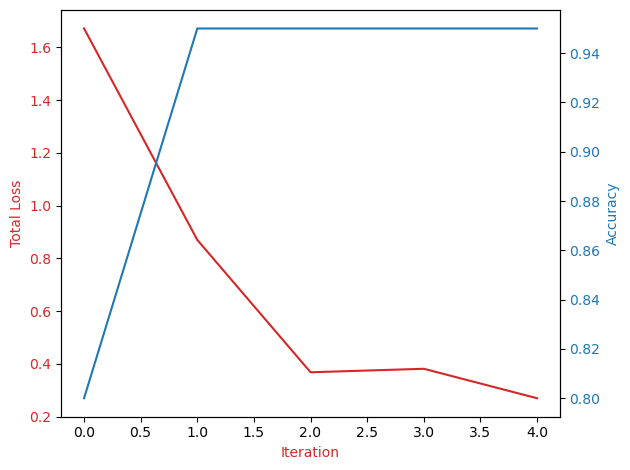

In [35]:
# Use the stored training loss and validation accuracy to plot learning curves
plot_stuff(loss_list, accuracy_list)


## Exercise 20: Interpret the Learning Curves
Observe the plot of training loss and validation accuracy over the training iterations:

Questions:
1. What trend do you observe in the training loss?

        A. It increases over time
        
        B. It decreases steadily
        
        C. It fluctuates randomly

2. What trend do you observe in the validation accuracy?

        A. It improves consistently
        
        B. It fluctuates but generally stays high
        
        C. It declines gradually


### Exercise 20 – Interpret the Learning Curves (Answers)

1. **Training loss trend:** **B** (it should generally decrease over time as the model learns).  
2. **Validation accuracy trend:** **A** (it should generally improve; small fluctuations are normal).


## Test Our Model with an Uploaded Image


Upload your image, and see if it will be correctly classified.
<p><b>Instructions on How to Upload an Image:</b></p>
Use the upload button and upload an image from your local machine:
<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction.png" width="300"  />
</center>


The image will now be in the directory in which you are working in. To read the image in a new cell, use the <code>cv2.imread</code> and read its name. For example, I uploaded <code>anothercar.jpg</code> into my current working directory - <code>cv2.imread("anothercar.jpg")</code>.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images/instruction2.png" width="300"  />
</center>


Else use the below images to test.


In [36]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ko-rMe71oPApYpUj2urgFQ/stop-1.jpeg"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/2oSHTMfHikZvnhKypHO9Uw/stop-2.jpeg"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/6GVQqlNsZ83-me4L9DzAIg/not-stop-1.jpeg"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/47aCgskKGqJTYmIkvV6_mA/not-stop-2.jpeg"

--2026-02-16 15:56:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/ko-rMe71oPApYpUj2urgFQ/stop-1.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 806107 (787K) [image/jpeg]
Saving to: ‘stop-1.jpeg’

stop-1.jpeg         100%[===================>] 787.21K   420KB/s    in 1.9s    

2026-02-16 15:56:50 (420 KB/s) - ‘stop-1.jpeg’ saved [806107/806107]

--2026-02-16 15:56:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/2oSHTMfHikZvnhKypHO9Uw/stop-2.jpeg
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-course

Define the class name and Load the model


## Exercise 21: Load a Trained Model for Inference
Instruction:
You have already trained a ResNet18 model to classify images as either "stop" or "not_stop". Complete the following code to recreate the architecture and load the saved weights for making predictions.

```python

# Define class labels used during training
# Fill in the class names ['not_stop', 'stop']
class_names = ['_____', '_____']  

# Load the same pretrained architecture used during training
# Should we use pretrained weights here? If no set False
model = models.resnet18(pretrained=_____) 

# Replace the fully connected layer to match number of output classes
# Replace with correct number of classes not_stop / stop
model.fc = torch.nn.Linear(model.fc.in_features, ___)  

# Load trained model weights
#saved model 
model.load_state_dict(torch.load("_____", map_location=torch.device('cpu'))) 

# Set the model to evaluation mode
model.____()  # Inference mode                                                                                                                                                                              


In [37]:
# Define class labels used during training
# (Prefer reading from the dataset if available; otherwise fall back to the expected labels.)
try:
    class_names = train_dataset.classes
except NameError:
    class_names = ['not_stop', 'stop']

# Recreate the model architecture and load weights
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(512, len(class_names))
model.load_state_dict(torch.load("model.pt", map_location=device))
model = model.to(device)
model.eval()

print("Loaded model with classes:", class_names)


Loaded model with classes: ['not_stop', 'stop']


/home/dacekey/anaconda3/envs/computer_vision/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## Exercise 22: Preprocess an Image for Prediction
Instruction:
To use a trained model for inference, you must preprocess input images in the same way as during training. This includes resizing, normalizing, and converting the image to a tensor.

Complete the code below to prepare a new image ("not_stop_1.jpeg") for prediction:

```python

# Define the same image transformations used during training
transform = transforms.Compose([
    transforms.____((224, 224)),       # Resize image
    transforms.____(),                 # Convert PIL image to tensor
    transforms.Normalize([0.485, 0.456, 0.406],   # Normalize using ImageNet stats
                         [0.229, 0.224, 0.225])
])

```


In [38]:
# Define the same image transformations used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])


## Exercise 23:Load and convert the image

```python
image_path = "_____"  # Provide image filename e.g stop_1.jpeg
image = Image.open(image_path).convert("_____")  # Ensure 3 channels e.g RGB

# Apply transformations and add batch dimension e.g 0
input_tensor = transform(image).unsqueeze(___)
```


In [39]:
from PIL import Image

# If the example image is not present, pick a random image from validation set
default_image = "not-stop-1.jpeg"  # matches the filename downloaded above
image_path = default_image

if not os.path.exists(image_path):
    # Try alternate names (some datasets use underscores)
    for alt in ["not_stop_1.jpeg", "stop-1.jpeg", "stop_1.jpeg", "not-stop-2.jpeg", "stop-2.jpeg"]:
        if os.path.exists(alt):
            image_path = alt
            break

image = Image.open(image_path).convert("RGB")  # Ensure 3 channels

# Apply transformations and add batch dimension
input_tensor = transform(image).unsqueeze(0).to(device)

print("Using image:", image_path)


Using image: not-stop-1.jpeg


## Exercise 24:
Why do we use unsqueeze(0) after applying transforms to the image?

        A. To normalize the image
        
        B. To convert it into RGB format
        
        C. To add a batch dimension for the model
        
        D. To flatten the image tensor



### Exercise 24 (Answer)

**C** — `unsqueeze(0)` adds a **batch dimension**, so the tensor becomes shape `[1, C, H, W]`, which is what the model expects.


## Exercise 25: Make a Prediction and Display the Result
Instruction:
Once the image is preprocessed and passed into the model, you can obtain the predicted class using torch.argmax(). Complete the code to classify and visualize the result.

```python

# Perform inference without tracking gradients using no_grad()
with torch.____():  
    outputs = model(input_tensor)  # Forward pass
    predicted_class = torch.____(outputs, dim=1).item()  # Get predicted class index using argmax

# Display result
print(f"The image was classified as: {class_names[predicted_class]}")

# Visualize the image with the predicted label
plt.imshow(image)  # Original image (PIL format)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis("_____")
plt.show()
```


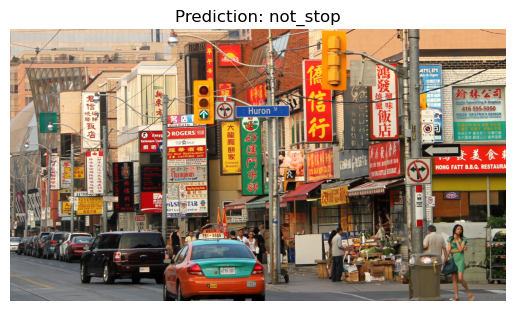

Predicted class: not_stop


In [40]:
# Perform inference without tracking gradients using no_grad()
with torch.no_grad():
    outputs = model(input_tensor)  # Forward pass
    predicted_idx = torch.argmax(outputs, dim=1).item()

predicted_label = class_names[predicted_idx]

# Display image and prediction
plt.figure()
plt.imshow(image)
plt.axis("off")
plt.title(f"Prediction: {predicted_label}")
plt.show()

print("Predicted class:", predicted_label)


### Congratulations! You've made it the end of your final project!

You've successfully built and evaluated an image classifier using transfer learning—a powerful and practical approach in modern computer vision. This marks a significant milestone in applying deep learning to real-world tasks.


## Authors


Joseph Santarcangelo

[Sathya Priya](https://www.linkedin.com/in/sathya-priya-06120a17a/) 



<!--## Change Log-->


<!--| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2025-07-04        | 1.0     | Sathya     | Created the notebook for peer assignment |
| 2021-05-25        | 0.3     | Yasmine    | Modifies Multiple Areas |
| 2021-05-25        | 0.3     | Kathy      | Modified Multple Areas. |
| 2021-03-08        | 0.2     | Joseph     | Modified Multiple Areas |
| 2021-02-01        | 0.1     | Joseph     | Modified Multiple Areas |-->


<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
